In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
df = pd.read_csv('/Users/zihaoxu/R_repos/BLB-RF-Sim/CSV/Linear_n_s_pct_MSE.csv')

In [66]:
df

,Unnamed: 0,n,s,pct,MSE
0,1,25,2,0.8,37.812694
1,2,25,4,0.8,39.470898
2,3,25,6,0.8,36.377995
3,4,25,8,0.8,47.024440
4,5,25,10,0.8,50.507024
5,6,50,2,0.8,23.037305
6,7,50,4,0.8,27.951085
7,8,50,6,0.8,31.544976
8,9,50,8,0.8,37.713938
9,10,50,10,0.8,28.598955


In [67]:
pct_fix = df[df['pct']==.8]
#s_fix = df[df['s']==10]

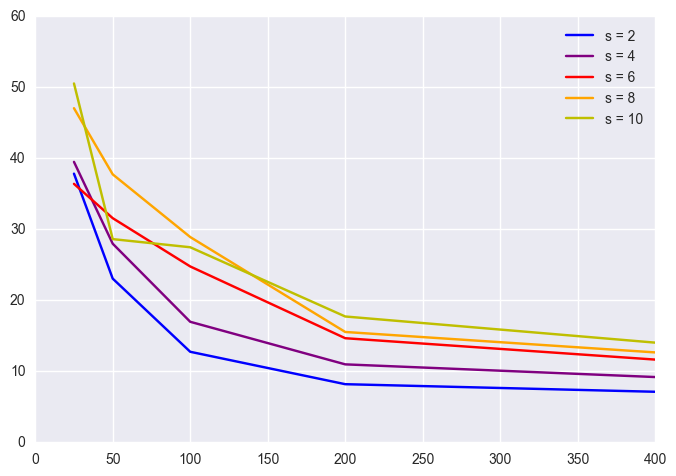

In [70]:
plt.figure()
color_dict = {2:'b', 4:'purple', 6:'r', 8:'orange', 10:'y'}
for s in pct_fix['s'].unique():
    temp = pct_fix[pct_fix['s']==s]
    plt.plot(temp['n'], temp['MSE'], c = color_dict[s], label = "s = " + str(s))
plt.legend()
plt.show()

In [12]:
pct_fix.groupby('n').mean()

,Unnamed: 0,gamma,pct,MSE
n,,,,
100,33.5,0.75,0.8,111.407365
200,39.5,0.75,0.8,326.198347
400,45.5,0.75,0.8,91.572999
800,51.5,0.75,0.8,273.217080
1600,57.5,0.75,0.8,151.421773
